### Generate Single Image of File

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
seeds = np.loadtxt('build/files/seed_list0.csv', delimiter=',', skiprows=1)
verticies = np.loadtxt('build/files/vertex_list0.csv', delimiter=',', skiprows=1)
edges = np.loadtxt('build/files/edge_list0.csv', delimiter=',', skiprows=1)

In [15]:
def plot_edge(edge):
    #plt.plot([edge[0], edge[2]], [edge[1], edge[3]], color = 'grey', zorder=1, linewidth = 1)
    plt.plot([edge[0], edge[2]], [edge[1], edge[3]], color = 'grey', zorder=1, linewidth = 1)

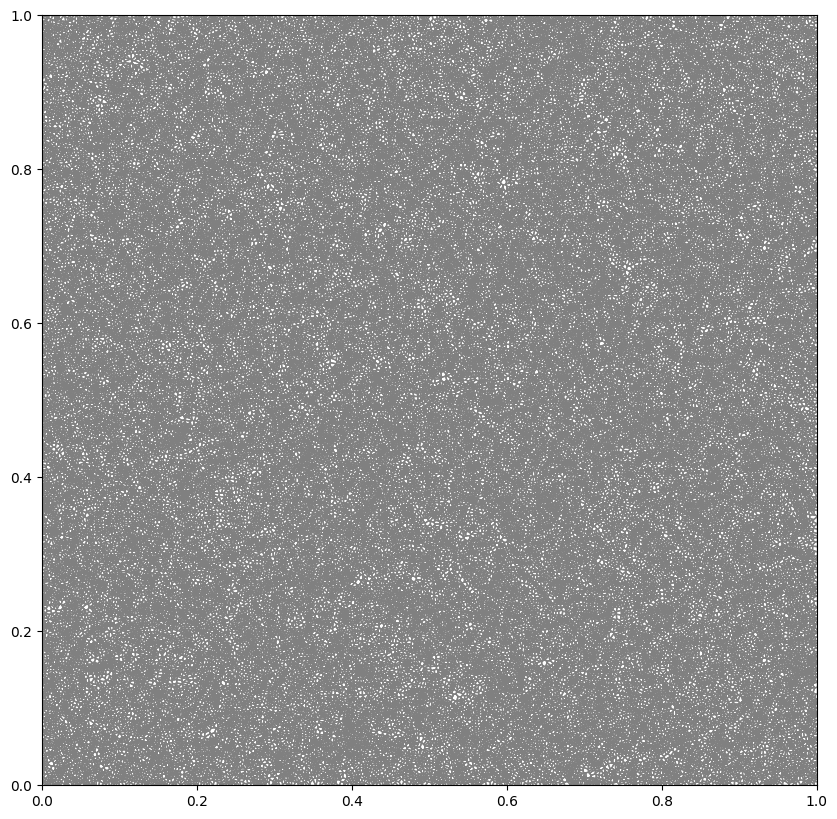

In [16]:
#plt.style.use('dark_background')
#plt.figure(figsize=(10,10), facecolor='black')
plt.figure(figsize=(10,10))
for edge in edges:
    plot_edge(edge)
#plt.scatter(seeds[:, 0], seeds[:, 1], s=10,  zorder = 2)
#plt.scatter(verticies[:, 0], verticies[:, 1], s=10, zorder =3)


plt.xlim(0, 1)
plt.ylim(0, 1)

plt.savefig("figures/single_picture.pdf")
plt.show()
# expect 215s aka 3min 35s for 100k
# 44.2s for 20k
# 21.5s for 10k
# 11.5 for 5k

### Generate Animation from List of files

created animation
0
0
1
2
3
4
5
6
7
saved animation
0


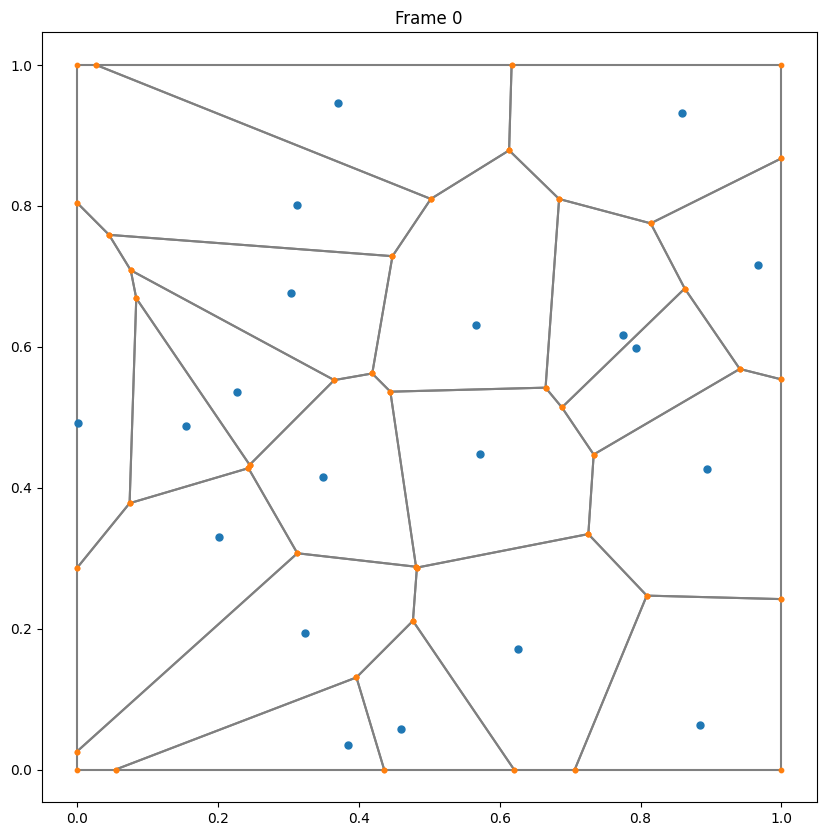

In [177]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from PIL import Image

def plot_edge(ax, edge):
    ax.plot([edge[0], edge[2]], [edge[1], edge[3]], color='grey', zorder=1)

def update(frame):
    plt.clf()
    
    # Load data from the current file
    seeds = np.loadtxt(f'build/files/seed_list{frame}.csv', delimiter=',', skiprows=1)
    verticies = np.loadtxt(f'build/files/vertex_list{frame}.csv', delimiter=',', skiprows=1)
    edges = np.loadtxt(f'build/files/edge_list{frame}.csv', delimiter=',', skiprows=1)

    # Plot edges
    for edge in edges:
        plot_edge(plt.gca(), edge)
    
    # Plot seeds and vertices
    plt.scatter(seeds[:, 0], seeds[:, 1], s=25, zorder=2)
    plt.scatter(verticies[:, 0], verticies[:, 1], s=10, zorder=3)

    plt.title(f'Frame {frame}')
    plt.axis('equal')  # Keep the aspect ratio equal for better visualization
    print(frame)

# Number of frames (assuming you have files numbered from 0 to 99)
num_frames = 8

# Create the animation
animation = FuncAnimation(plt.figure(figsize=(10, 10)), update, frames=num_frames, interval=200, repeat=False)
print('created animation')

# Save the animation as a GIF using Pillow writer
animation_file = 'figures/voronoi_animation.gif'
animation.save(animation_file, writer='pillow', fps=1)
print('saved animation')

### Compare Timing

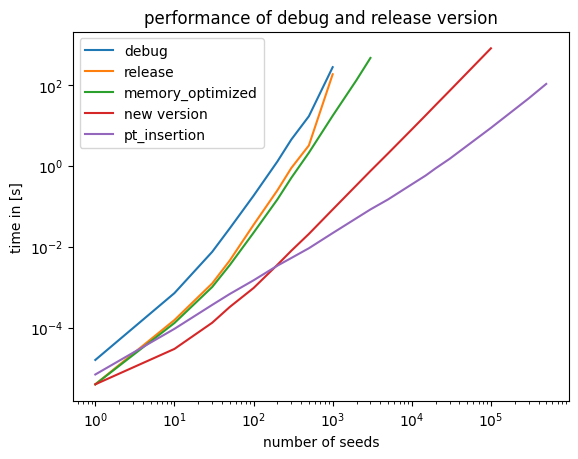

In [216]:
debug = np.loadtxt('build/benchmarks/times_debug_naive.csv', delimiter=',', skiprows=1)
release = np.loadtxt('build/benchmarks/times_release_naive.csv', delimiter=',', skiprows=1)
release_memory_opt = np.loadtxt('build/benchmarks/times_release_memory_opt.csv', delimiter=',', skiprows=1)
new_algorithm = np.loadtxt('build/benchmarks/time_hp_intersect_with_memory_log.csv', delimiter=',', skiprows=1)
pt_insertion = np.loadtxt('build/benchmarks/time_new_alg_testversion.csv', delimiter=',', skiprows=1)


plt.title('performance of debug and release version')
plt.xlabel('number of seeds')
plt.ylabel('time in [s]')
plt.yscale('log')
plt.xscale('log')
plt.plot(debug[:, 0], debug[:, 1]/1000000, label = 'debug')
plt.plot(release[:, 0], release[:, 1]/1000000, label = 'release')
plt.plot(release_memory_opt[:, 0], release_memory_opt[:, 1]/1000000, label = 'memory_optimized')
plt.plot(new_algorithm[:, 0], new_algorithm[:, 1]/1000000, label = 'new version')
plt.plot(pt_insertion[:, 0], pt_insertion[:, 1]/1000000, label = 'pt_insertion')
plt.legend(loc = 'best')
#plt.savefig("figures/benchmark.png")
plt.show()

2.9994097633881784
2.9994097633881784


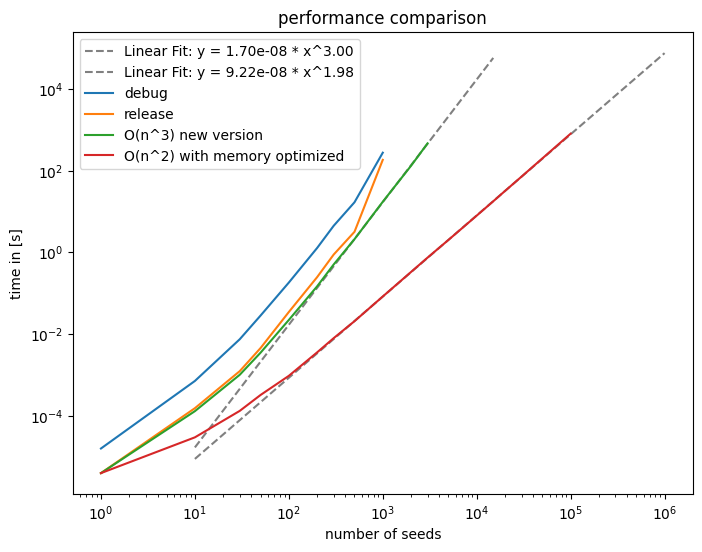

In [64]:
from scipy.optimize import curve_fit

def line(x, m, b):
    return m*x + b

plt.figure(figsize=(8,6))

popt, pcov = curve_fit(line, np.log(release_memory_opt[7:, 0]), np.log(release_memory_opt[7:,1]/1000000))

print(popt[0])
m = popt[0]
b = popt[1]

# Plot the linear fit
x_fit = np.linspace(min(release_memory_opt[1:, 0]), max(release_memory_opt[:, 0])*5, 100)
y_fit = np.exp(line(np.log(x_fit), m, b))
plt.plot(x_fit, y_fit, label=f'Linear Fit: y = {np.exp(b):.2e} * x^{m:.2f}', color='grey', linestyle = '--')


popt1, pcov1 = curve_fit(line, np.log(new_algorithm[7:-1, 0]), np.log(new_algorithm[7:-1,1]/1000000))

print(popt[0])
m1 = popt1[0]
b1 = popt1[1]

# Plot the linear fit
x_fit = np.linspace(min(new_algorithm[1:, 0]), max(new_algorithm[:, 0])*10, 100)
y_fit = np.exp(line(np.log(x_fit), m1, b1))
plt.plot(x_fit, y_fit, label=f'Linear Fit: y = {np.exp(b1):.2e} * x^{m1:.2f}', color='grey', linestyle = '--')



plt.title('performance comparison')
plt.xlabel('number of seeds')
plt.ylabel('time in [s]')
plt.yscale('log')
plt.xscale('log')
plt.plot(debug[:, 0], debug[:, 1]/1000000, label = 'debug')
plt.plot(release[:, 0], release[:, 1]/1000000, label = 'release')
plt.plot(release_memory_opt[:, 0], release_memory_opt[:, 1]/1000000, label = 'O(n^3) new version')
plt.plot(new_algorithm[:, 0], new_algorithm[:, 1]/1000000, label = 'O(n^2) with memory optimized')
plt.plot(pt_insertion[:, 0], pt_insertion[:, 1]/1000000, label = 'pt_insertion')

plt.legend(loc = 2)
plt.savefig("figures/benchmark.png")
plt.show()


8.810975311558309  KB per Seed


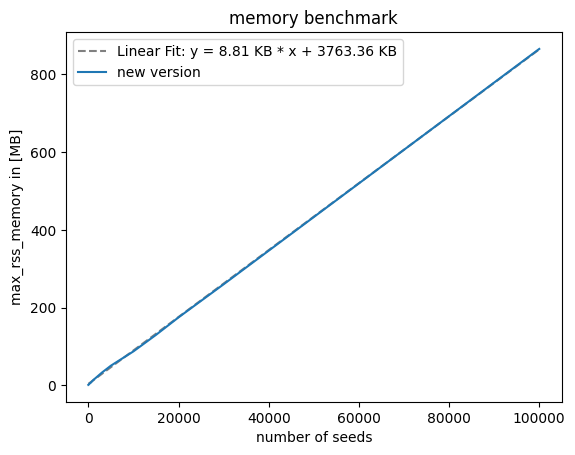

In [62]:
new_algorithm_memory = np.loadtxt('build/benchmarks/memory_hp_intersect_with_memory_log.csv', delimiter=',', skiprows=1)


popt1, pcov1 = curve_fit(line, new_algorithm_memory[9:, 0], new_algorithm_memory[9:,1]/1024/1024)

print((popt1[0]*1024), ' KB per Seed')
m1 = popt1[0]
b1 = popt1[1]

# Plot the linear fit
x_fit = np.linspace(min(new_algorithm_memory[1:, 0]), max(new_algorithm_memory[:, 0])*1, 100)
y_fit = line(x_fit, m1, b1)
plt.plot(x_fit, y_fit, label=f'Linear Fit: y = {m1*1024:.2f} KB * x + {b1*1024:.2f} KB', color='grey', linestyle = '--')

plt.title('memory benchmark')
plt.xlabel('number of seeds')
plt.ylabel('max_rss_memory in [MB]')
plt.plot(new_algorithm_memory[:, 0], new_algorithm_memory[:, 1]/1024/1024, label = 'new version')
plt.legend(loc = 'best')
plt.savefig("figures/memory_benchmark.png")
plt.show()

1.0827711892774063


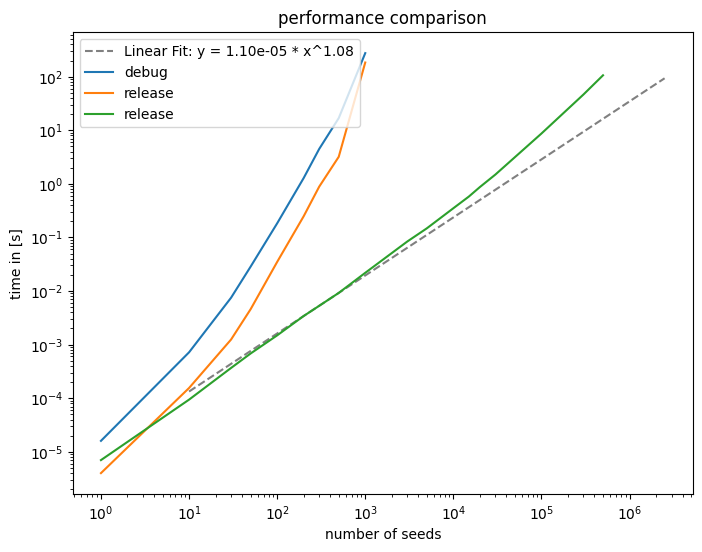

In [212]:
from scipy.optimize import curve_fit

def line(x, m, b):
    return m*x + b

plt.figure(figsize=(8,6))

popt, pcov = curve_fit(line, np.log(pt_insertion[5:8, 0]), np.log(pt_insertion[5:8,1]/1000000))

print(popt[0])
m = popt[0]
b = popt[1]

# Plot the linear fit
x_fit = np.linspace(min(pt_insertion[1:, 0]), max(pt_insertion[:, 0])*5, 100)
y_fit = np.exp(line(np.log(x_fit), m, b))
plt.plot(x_fit, y_fit, label=f'Linear Fit: y = {np.exp(b):.2e} * x^{m:.2f}', color='grey', linestyle = '--')



plt.title('performance comparison')
plt.xlabel('number of seeds')
plt.ylabel('time in [s]')
plt.yscale('log')
plt.xscale('log')
plt.plot(debug[:, 0], debug[:, 1]/1000000, label = 'debug')
plt.plot(release[:, 0], release[:, 1]/1000000, label = 'release')
plt.plot(pt_insertion[:, 0], pt_insertion[:, 1]/1000000, label = 'release')

plt.legend(loc = 2)
plt.show()
